In [85]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer


In [86]:
dir_csv = 'outputs/labels_cleaned_y1c1c2.csv'
df = pd.read_csv(dir_csv, encoding='utf-8')

In [179]:
# -- Bag of Words ---
wordvec_names, wordvec_counts= ml_tools.BoW(df['Content'].tolist())
y_b = df['ReasoningLevel'].tolist()

# -- Feature extraction: TF-IDF ---
# X_t = ml_tools.tf_idf(df['Content'].tolist())
X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))
X_t = X_t[1]
y_t = df['ReasoningLevel'].tolist()


# coding the labels so easily interpretable by the computer
lb = LabelBinarizer()
lb.fit(y_b)
y_b = lb.transform(y_b)



<ipython-input-179-d7436c7e9586>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))


In [180]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t , train_size = 0.8)

In [175]:
#splitting to data set~
print(len(wordvec_counts))
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(wordvec_counts, y_b , train_size = 0.5)

95


In [82]:
input = X_train_b.shape[1]
print(input)

4715


In [83]:
maxlen = 100 
model = Sequential()
model.add(layers.Dense(10, input_dim = input, activation  = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.add(layers.Flatten())
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
model.build(input)
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 10)                47160     
                                                                 
 dense_72 (Dense)            (None, 1)                 11        
                                                                 
 flatten_31 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________


In [84]:
def NN(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(10, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    return history


nn1 = NN(Sequential(), input, 2500, X_train_b, y_train_b, X_test_b, y_test_b)
print(nn1)


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 10)                47160     
                                                                 
 dense_74 (Dense)            (None, 1)                 11        
                                                                 
 flatten_32 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2500
2/2 [==============================] - 2s 466ms/step - loss: 1.2120 - accuracy: 0.2819 - val_loss: 0.7575 - val_accuracy: 0.5104
Epoch 2/2500
2/2 [==============================] - 0s 44ms/step - loss: 0.7105 - accuracy: 0.5585 - val_loss: 0.6000 - val_accuracy: 0.7500
Epoch 3/2500
2/2 [============

KeyboardInterrupt: 

0.00011155579793694529 and mean: 0.7496978723764419


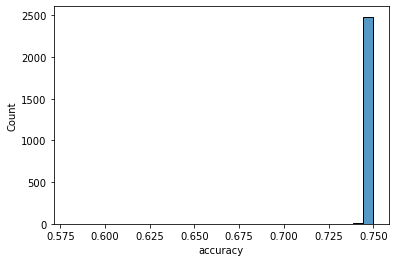

In [ ]:
acc = nn1.history['accuracy']
accu_val  = pd.DataFrame(acc, columns= ['accuracy'])
import seaborn as sns
from scipy.stats import sem
sns.histplot(data=accu_val, x = 'accuracy', bins=30)
mean_val_acc= sum(acc)/len(acc)
sem_val     = sem(acc)
print(sem_val, 'and mean:', mean_val_acc)
array = [mean_val_acc, sem_val]

In [ ]:
labels = ['ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
labels2 = ['ArgumentLevel','ReasoningLevel','ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
features = ['ifidf','bow'] #'bow', 'ifidf'
num_epochs = 2500
train_sizes = [0.5,0.6,0.7,0.8,0.9] 



In [ ]:
accuracies = []
accuracies_sem = []
dummy = []
for i in train_sizes:
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(wordvec_counts, y_b , train_size = i)
    input = X_train_b.shape[1]
    nn1 = NN(Sequential(), input, 1000, X_train_b, y_train_b, X_test_b, y_test_b)
    dummy.append(nn1.history['accuracy'])

for array in dummy:
    accuracies.append(np.sum(array)/len(array))
    accuracies_sem.append(sem(array))



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                47160     
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
 flatten_21 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 234ms/step - loss: 1.3373 - accuracy: 0.6543 - val_loss: 1.4567 - val_accuracy: 0.7500
Epoch 2/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.3553 - accuracy: 0.7500 - val_loss: 1.2489 - val_accuracy: 0.4062
Epoch 3/1000
2/2 [============

No handles with labels found to put in legend.


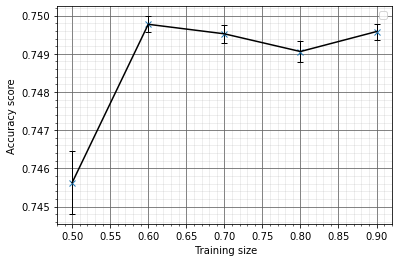

In [ ]:
#----- bag of words, RL ------
plt.plot(train_sizes, accuracies, 'x')
plt.errorbar(train_sizes, accuracies, yerr = accuracies_sem, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
#plt.title('bow - RL - NN - 1000 epochs')
plt.legend()
filepath = 'outputs/NN-RL-BOW-1000 epoch'
plt.savefig(filepath)

In [31]:
# -- Bag of Words --- Argument level
wordvec_names_a, wordvec_counts_a= ml_tools.BoW(df['Content'].tolist())
y_b_al = df['ArgumentLevel'].tolist()

# -- Feature extraction: TF-IDF ---
#X_t = ml_tools.tf_idf(df['Content'].tolist())
#y_t = df['ReasoningLevel']

# coding the labels so easily interpretable by the computer
lb = LabelBinarizer()
lb.fit(y_b_al)
y_b_al= lb.transform(y_b_al)

In [32]:
#----- bow, AL --------
accuracies_al = []
accuracies_sem_al = []
dummy = []
for i in train_sizes:
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(wordvec_counts, y_b , train_size = i)
    input = X_train_b.shape[1]
    nn1 = NN(Sequential(), input, 1000, X_train_b, y_train_b, X_test_b, y_test_b)
    dummy.append(nn1.history['accuracy'])

for array in dummy:
    accuracies_al.append(np.sum(array)/len(array))
    accuracies_sem_al.append(sem(array))

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 10)                47160     
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
 flatten_26 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 1s 264ms/step - loss: 0.7573 - accuracy: 0.6330 - val_loss: 0.6660 - val_accuracy: 0.6562
Epoch 2/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.6304 - accuracy: 0.6755 - val_loss: 0.6716 - val_accuracy: 0.7500
Epoch 3/1000
2/2 [============

No handles with labels found to put in legend.


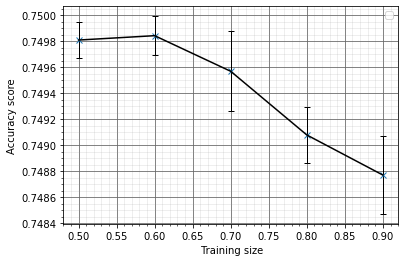

In [33]:
#----- bag of words, AL ------
plt.plot(train_sizes, accuracies_al, 'x')
plt.errorbar(train_sizes, accuracies_al, yerr = accuracies_sem_al, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
#plt.title('bow - RL - NN - 1000 epochs')
#plt.legend()
filepath = 'outputs/NN-AL-BOW-1000 epoch'
plt.savefig(filepath)

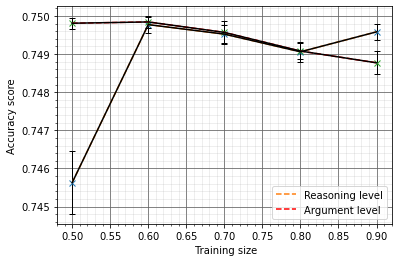

In [39]:
plt.plot(train_sizes, accuracies, 'x')
plt.plot(train_sizes, accuracies, '--', label = 'Reasoning level')
plt.errorbar(train_sizes, accuracies, yerr = accuracies_sem, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.plot(train_sizes, accuracies_al, 'x')
plt.plot(train_sizes, accuracies_al, '--', label = 'Argument level', color = 'red')
plt.errorbar(train_sizes, accuracies_al, yerr = accuracies_sem_al, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
plt.legend()

#filepath = 'outputs/Comparison- NN-BOW-1000 epoch'
#plt.savefig(filepath)

In [226]:
# -- Feature extraction: TF-IDF ---
X_t = ml_tools.tf_idf(df['Content'].tolist())[1]
y_t = df['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_t)
y_t = lb.transform(y_t)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t , train_size = 0.7)
print(X_t.shape)
print(y_t.shape)
print(X_train_t.shape[1])

(95, 4715)
(95, 4)
4715


In [223]:
def NN2(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(512, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    return history

In [229]:
accuracies_rlt = []
accuracies_sem_rlt = []
dummy = []
for i in train_sizes:
    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t , train_size = i)
    input = X_train_t.shape[1]
    nn1 = NN(Sequential(), input, 1000, X_train_t, y_train_t, X_test_t, y_test_t)
    dummy.append(nn1.history['accuracy'])

for array in dummy:
    accuracies_rlt.append(np.sum(array)/len(array))
    accuracies_sem_rlt.append(sem(array))


Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 10)                47160     
                                                                 
 dense_102 (Dense)           (None, 1)                 11        
                                                                 
 flatten_38 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 47,171
Trainable params: 47,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 3s 420ms/step - loss: 0.6903 - accuracy: 0.7181 - val_loss: 0.6832 - val_accuracy: 0.7500
Epoch 2/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.6813 - accuracy: 0.7500 - val_loss: 0.6739 - val_accuracy: 0.7500
Epoch 3/1000
2/2 [============

In [ ]:
#----- bag of words, AL ------
plt.plot(train_sizes, accuracies_al, 'x')
plt.errorbar(train_sizes, accuracies_al, yerr = accuracies_sem_al, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
#plt.title('bow - RL - NN - 1000 epochs')
#plt.legend()
filepath = 'outputs/NN-AL-BOW-1000 epoch'
plt.savefig(filepath)